In [1]:
import numpy as np 
import os 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

## **Read Dataset** 

In [6]:
data_path="C:/Users/StarNet/Downloads/archive (1)/dataset"

In [7]:
classes_name=os.listdir(data_path)
classes_name

['dew',
 'fogsmog',
 'frost',
 'glaze',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

## **Data Visualization** 

In [8]:
def plot_img(class_name):
    plt.figure(figsize=(15,10))
    
    for i,category in enumerate(class_name):
        img_path=data_path+'/'+category
        img_in_folder=os.listdir(img_path)
        
        first_img=img_in_folder[1]
        first_img_path=img_path+'/'+first_img
        
        img=image.load_img(first_img_path)
        img_array=image.img_to_array(img)/255
        
        plt.subplot(5,6,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

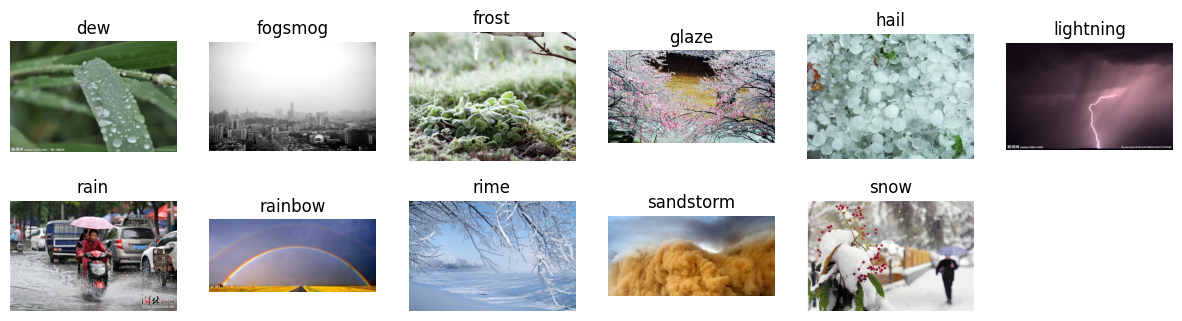

In [9]:
plot_img(classes_name)

## **Data Preprocessing**

In [10]:
data_generator=ImageDataGenerator(rescale=(1./255),
                                 validation_split=.20)

In [11]:
train_data=data_generator.flow_from_directory(data_path,
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             class_mode='categorical',
                                             subset='training')

Found 5493 images belonging to 11 classes.


In [12]:
test_data=data_generator.flow_from_directory(data_path,
                                             target_size=(224,224),
                                             batch_size=1,
                                             shuffle=True,
                                             class_mode='categorical',
                                             subset='validation')

Found 1369 images belonging to 11 classes.


## **Model Building**

In [28]:
model=Sequential()
# Add Convolution layer with 32 filters, relu activation function and inputshape
model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=[224,224,3]))

# Add MaxPooling layer for decrease dimansionalty of the feature without lossing important information
model.add(MaxPooling2D(pool_size=(2,2)))

# Add BatchNormalization layer for reduce overfitting
model.add(BatchNormalization())

# Add Convolution layer with 32 filters and relu activation function
model.add(Conv2D(64,3,padding='same',activation='relu'))

# Add MaxPooling layer for decrease dimansionalty of the feature without lossing important information
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Dropout layer for reduce overfitting
model.add(Dropout(0.25))
model.add(Flatten())

# Add fully connected layer & Output layer
model.add(Dense(11,activation='softmax'))

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model_hist=model.fit(train_data,validation_data=test_data,epochs=5,batch_size=32)

Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 90s 515ms/step - accuracy: 0.4394 - loss: 10.1182 - val_accuracy: 0.2827 - val_loss: 2.2975
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 89s 515ms/step - accuracy: 0.7946 - loss: 0.6570 - val_accuracy: 0.4799 - val_loss: 1.7808
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 89s 512ms/step - accuracy: 0.8963 - loss: 0.3383 - val_accuracy: 0.5997 - val_loss: 1.2812
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 89s 512ms/step - accuracy: 0.9301 - loss: 0.2156 - val_accuracy: 0.5522 - val_loss: 2.1672
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 91s 524ms/step - accuracy: 0.9621 - loss: 0.1478 - val_accuracy: 0.6684 - val_loss: 1.8081


In [31]:
model.evaluate(train_data)

172/172 ━━━━━━━━━━━━━━━━━━━━ 25s 146ms/step - accuracy: 0.9528 - loss: 0.1546


[0.1618838608264923, 0.9497542381286621]

In [32]:
model.evaluate(test_data)

1369/1369 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6848 - loss: 1.8324


[1.808066725730896, 0.6683710813522339]

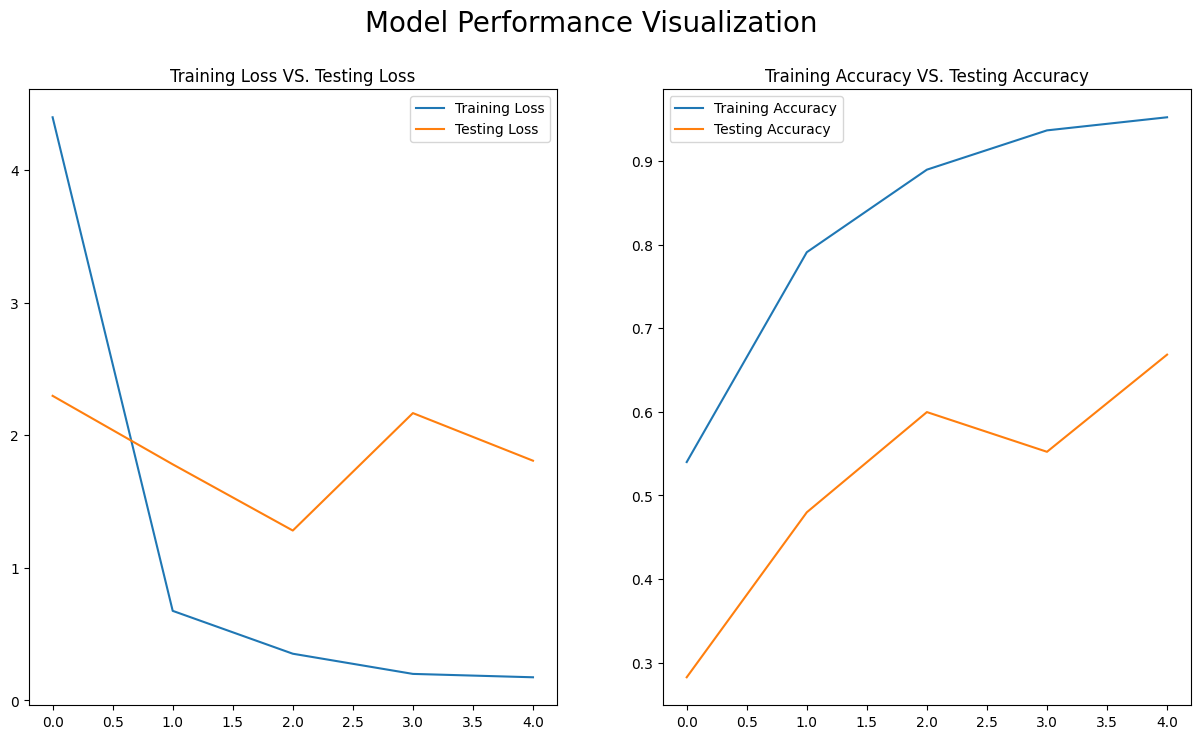

In [33]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Model Performance Visualization',fontsize=20)
ax[0].plot(model_hist.history['loss'],label='Training Loss')
ax[0].plot(model_hist.history['val_loss'],label='Testing Loss')
ax[0].set_title('Training Loss VS. Testing Loss')
ax[0].legend()

ax[1].plot(model_hist.history['accuracy'],label='Training Accuracy')
ax[1].plot(model_hist.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title('Training Accuracy VS. Testing Accuracy')
ax[1].legend()
plt.show()

In [34]:
test_img="D:/Image/lightning.jpg"

In [35]:
class_map=dict([value,key] for key , value in train_data.class_indices.items())
class_map

{0: 'dew',
 1: 'fogsmog',
 2: 'frost',
 3: 'glaze',
 4: 'hail',
 5: 'lightning',
 6: 'rain',
 7: 'rainbow',
 8: 'rime',
 9: 'sandstorm',
 10: 'snow'}

In [42]:
def predicate_img(test_img,actual_label):
    test_image=image.load_img(test_img,target_size=(224,224))
    img_array=image.img_to_array(test_image)/255
    img_reshape=img_array.reshape((1,img_array.shape[0],
                                  img_array.shape[1],
                                  img_array.shape[2]))
    
    predict_class=np.argmax(model.predict(img_reshape))
    predicate_map=class_map[predict_class]
    
    plt.figure(figsize=(10,5))
    plt.imshow(img_array)
    plt.grid()
    plt.axis('off')
    plt.title(f"Actual Label is: {actual_label} | predict label is: {predicate_map}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


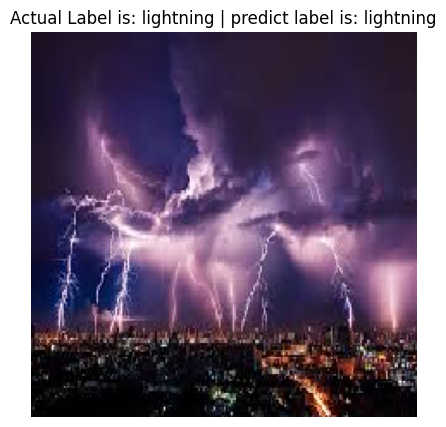

In [43]:
predicate_img(test_img,'lightning')

In [45]:
test_image="D:/Image/snow.jpeg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


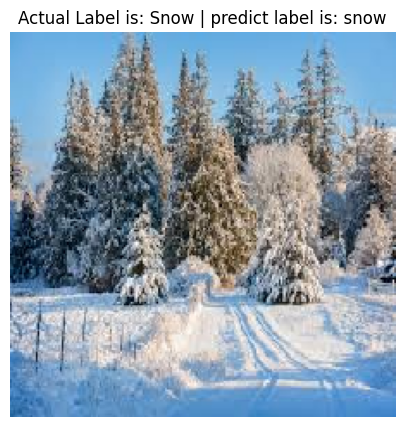

In [46]:
predicate_img(test_image,'Snow')